## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading the csv file into a panda dataframe

In [2]:
data = pd.read_csv("CarPrice_Assignment.csv")
print(data)

     car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88

## Before we begin linear regression, we must pre-process the data to make it more suitable for the regression model to work on 
### Converting categorical data to numerical data

In [3]:
X = data.drop('price', axis=1)  # replace 'target_variable' with your actual target variable
y = data['price']
data_cat = X.select_dtypes(include=['object'])  
data_num = X.select_dtypes(include=['number'])
mean = data_num.mean(axis=0)
std = data_num.std(axis=0)
data_num_norm = (data_num - mean) / std

data_cat_proc = pd.get_dummies(data_cat, drop_first=True) 
boolean_cols = data_cat_proc.columns[data_cat_proc.dtypes == 'bool']
data_cat_proc[boolean_cols] = data_cat_proc[boolean_cols].astype(int)
data_proc = pd.concat([data_num_norm, data_cat_proc], axis=1) 

### Splitting given data into a dataset for training and another for testing

In [4]:

test_size = 0.3

n_samples = data_proc.shape[0]

n_test_samples = int(n_samples * test_size)
print(n_test_samples)

indices = np.arange(n_samples)
np.random.shuffle(indices)

# Split the data into training and testing sets
train_indices = indices[n_test_samples:]
test_indices = indices[:n_test_samples]

X_train = data_proc.iloc[train_indices]
y_train = y.iloc[train_indices]


X_test = data_proc.iloc[test_indices]
y_test = y.iloc[test_indices]
mse_values = []

61


## Performing Linear Regression
### Creating a class LinearRegression, setting its properties and defining its functions

In [5]:
class LinearRegression:
    def __init__(self, lr = 0.01, n_iters = 2000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = 0
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for i in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            delw = (1/n_samples)*np.dot(X.T, (y_predicted - y))
            delb = (1/n_samples)*np.sum(y_predicted - y)
            self.weights = self.weights - self.lr*delw
            self.bias = self.bias - self.lr*delb
            mse = np.mean((y_predicted - y) ** 2)
            mse_values.append(mse)
    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

### Creating Object to run linear regression on data

[ 8174.63204792  4883.40571078  7282.8558672   7325.71318113
 15876.11346952  9345.69424104  7039.88824277  6256.07389422
  7205.10665682 10376.45491035  9811.30386312 -1275.3285918
  7789.11664136 16569.85326635 14411.26188444 10680.35107251
  7085.23077117 18957.43861463  8589.25428257  8772.14215879
 12189.75749275 21808.28826746  7148.14130784  5676.50870355
 12954.76889322 13683.44145516  6438.37426385 33344.11993949
  6658.25142794  9037.30673146 17948.07707847  5713.08219887
 10174.20727891 10958.53242503 10011.02447861 17680.17754791
  9936.14472865 30287.59885601  8881.76819368  5719.58970006
 20184.88755946 28901.65469028 15600.38119855  5563.59243893
  9157.89289815 20674.40371396  6617.16908701 14611.7597217
 11020.41224558 28564.37599424  5882.6433337  28708.50455758
  9253.66774196 28761.44710916  6826.73126734  7458.60520721
 17873.9545406   8193.4464292   7603.89594845  5935.97286973
 11580.00448726]


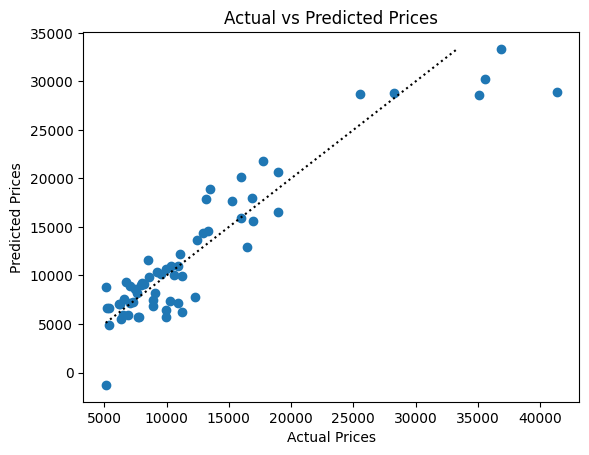

In [6]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)
predictions = regressor.predict(X_test)
print(predictions)
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([min(y_test), max(predictions)], [min(y_test), max(predictions)], 'k:')
plt.show()

## Depiction of change in MSE over iterations

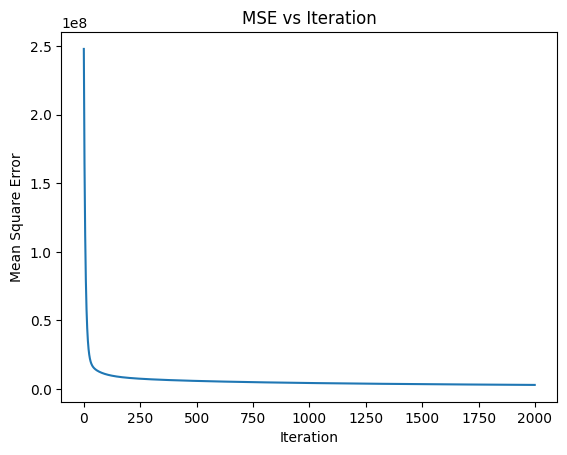

In [7]:
plt.plot(mse_values)
plt.xlabel('Iteration')
plt.ylabel('Mean Square Error')
plt.title('MSE vs Iteration')
plt.show()

## Calculating R2 score

In [8]:

total_sum = np.sum((y_test - np.mean(y_test)) ** 2)
residual_sum = np.sum((y_test - predictions) ** 2)
r2 = 1 - (residual_sum/total_sum)
print(r2)

0.8542738715033691
